In [109]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [117]:
# Create confessionals DataFrame
confessionals = pd.read_excel('Confessionals/Survivor 40 Confessionals (Winners at War)/Survivor Season 40 Confessionals Grouped by Castaways (Winners at War).xlsx')
confessionals = confessionals.dropna(axis=1, how='all')

# Get rankings of players
data = pd.read_excel('Data/Leaderboard_ S1-S40.xlsx')
data = data[data['single-'] == 'S40']
data = data.rename(columns={'single-': 'Season', 'contestant': 'Contestant'})
rankings = data[['Contestant', 'Finish']].copy().reset_index()
rankings = rankings.drop('index', axis=1)
rankings.sort_values(by='Finish', inplace=True)

In [118]:
# Remove the (#/#)
def remove_nums(text):
    if type(text) == str:
        return re.sub(' \([0-9]+/[0-9]+\)', '', text)
    return text

for col in df.columns:
    confessionals[col] = confessionals[col].apply(remove_nums)
confessionals

,Tony,Natalie,Michele,Sarah,Ben,Denise,Nick,Jeremy,Kim,Sophie,Tyson,Adam,Wendell,Yul,Sandra,Parvati,Rob,Ethan,Danni,Amber
0,"Tony: I have a big reputation in Survivor, but...",Natalie: My relationship with Jeremy started o...,Michele: Everybody is going to be laying it al...,Sarah: It’s going to be a bloodbath.,Ben: My competition here is the greatest of th...,"Denise: Losing that very first challenge, I wa...",Nick: We were given the in-game currency calle...,Jeremy: It’s going to be a war.,"Kim: All of a sudden, I’m getting a very bad v...","Sophie: Right now, I think you got, like, the ...","Tyson: Honestly, Survivor has been my professi...",Adam: Let the fireworks begin.,"Wendell: After winning Survivor season 36, Gho...","Yul: We get to our island, and I’m thinking, “...",Sandra: I’m shocked to see Rob and Amber. I sp...,Parvati: I haven’t had an opportunity to be my...,"Rob: Obviously, I have a huge target on myself...",Ethan: I was diagnosed with Hodgkin’s lymphoma...,"Danni: Survivor: Guatemala, that I won, season...",Amber: I was a kid the first time I played the...
1,"Tony: I desperately want the Immunity Idol, es...",Natalie: I don’t think it’s hit me yet that I ...,Michele: Tribal probably couldn’t have gone wo...,Sarah: Even though I’m the most recent female ...,Ben: I don’t know how I found myself with all ...,Denise: Holy crab cakes! I just found an idol....,Nick: (shouts - imitating Tony),"Jeremy: Denise and Adam, they walk off. Really...","Kim: So far this season, it’s been a really di...","Sophie: This season, every single person is a ...",Tyson: The poker alliance is coming back to bi...,"Adam: To lose the Immunity Challenge on Day 1,...","Wendell: This ladder, it’s got to be like, 20 ...","Yul: When I played Cook Islands, I tried to pl...",Sandra: You ask anybody that’s a Survivor fan:...,Parvati: It’s been ten years since I played th...,Rob: I respect the fact that Danni told me the...,"Ethan: Going through cancer, it-- you know, it...",Danni: Playing with winners definitely makes e...,Amber: People seemed pretty comfortable when w...
2,"Tony: But right now, I don’t wanna put a targe...",Natalie: The tokens are cool. I don’t know how...,Michele: Nobody wanted to walk off. We know th...,Sarah: I’ve known Tony for six years. I love t...,"Ben: Names are being thrown out, nobody really...",Denise: We open it up and it’s two. So now I h...,Nick: Tyson’s a troublemaker. He’s got it out ...,Jeremy: It really sucks losing Nat. It’s a pun...,"Kim: When I found it, it was such a surreal mo...",Sophie: I was in shock. Kim should be telling ...,Tyson: He’s surely joking. I know we signed wa...,Adam: I did not sleep one wink last night. We’...,Wendell: Tyson is one of the greats. This is h...,Yul: People are trying to recruit soldiers int...,Sandra: And I know what it’s like to go up aga...,Parvati: Rob and I have a history that is a ch...,"Rob: When Adam and Denise ran off, initially, ...",Ethan: The pace of the game is warp speed. I a...,"Danni: It’s been 14 years since I’ve played, a...",Amber: Everybody is running around like a chic...
3,"Tony: Tyson wants to vote me out. Oh, come on,...",Natalie: I had one token. I had to give it up ...,Michele: Right now it seems absolutely essenti...,"Sarah: The last time Cops-R-Us happened, the o...",Ben: That old-school camp is just intimidating...,"Denise: Right now, I’m feeling like I’m in a f...",Nick: I was so relieved to have Tyson out of h...,"Jeremy: This is huge for my game. Last Tribal,...",Kim: I’m as agreeable to Tony at the moment of...,Sophie: I don’t even want to call it a ladder....,Tyson: How is this guy still alive? He does no...,Adam: I went to look for the water well with D...,"Wendell: So, there are peop-- there-there are ...",Yul: The great thing is I don’t think people e...,Sandra: It’s very rare for me to take somethin...,"Parvati: Right now, we’re voting out either Ad...","Rob: Winning the challenge, it’s a great momen...","Ethan: Oh, my God. We had a p

In [131]:
# Get the counts of the confessionals for each contestant
confessional_counts = confessionals.notnull().sum()
confessional_counts = pd.DataFrame({"Contestant": confessional_counts.index, "Counts": confessional_counts.values})
confessional_counts.head()

,Contestant,Counts
0,Tony,73
1,Natalie,38
2,Michele,36
3,Sarah,40
4,Ben,38


In [132]:
rankings['Contestant'] = rankings['Contestant'].apply(lambda x: x.strip().split()[0])
# Fix Boston Rob
rankings['Contestant'][16] = 'Rob'
counts_and_rankings = pd.merge(confessional_counts, rankings)
counts_and_rankings.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Contestant,Counts,Finish
0,Tony,73,1
1,Natalie,38,2
2,Michele,36,3
3,Sarah,40,4
4,Ben,38,5


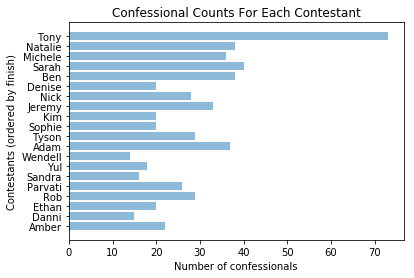

In [135]:
# Plot a bar graph of confessionals vs. place
plt.barh(counts_and_rankings['Finish'], counts_and_rankings['Counts'], align='center', alpha=0.5)
plt.yticks(counts_and_rankings['Finish'], counts_and_rankings['Contestant'])
plt.gca().invert_yaxis()
plt.title("Confessional Counts For Each Contestant")
plt.xlabel("Number of confessionals")
plt.ylabel("Contestants (ordered by finish)")
plt.show()

It is expected that the top contestants would have more confessionals than the contestants voted out earlier. However, it is surprising that Tony had so many more than the rest of the bunch. Also, the Extinction Island aspect to the season helps even out the number of confessionals because contestants that were voted out earlier still have the opportunity to have confessionals throughout the season.